# Exploration and Comparison of Transformers for Image Classification

Comparison of the results for **every experiment** across all datasets for each model.

This notebook also contains advanced data analysis from the results.

Showing the results in a different file is to avoid information and visual clutter.

NOTE: Since variables are not saved accros multiple jupyter notebook files, the data needs to be taken from the individual notebooks and hardcoded here.

## Prerequisites

Load necessary packages.

In [4]:
import os
os.chdir('..')
from utils.data_utils import *
from utils.visualization_utils import *
import pandas as pd
import numpy as np

In [5]:
dataset_names = ['RESISC45', 'Food-101', 'FER2013', 'PatchCamelyon', 'SUN397', 'DTD']
models = ['ViT', 'DeiT', 'Swin', 'CLIP']

## Zero-shot transfer using CLIP

In [6]:
experiments = ['Class label', 'Basic template', 'Custom template', 'OpenAI template']

In [7]:
resisc45_zst = [0.543968, 0.565714, 0.595556, 0.616349]
food101_zst = [0.866693, 0.865703, 0.884911, 0.887366]
fer2013_zst = [0.408470, 0.454723, 0.458624, 0.435219]
pcam_zst = [0.558472, 0.553802, 0.536652, 0.540833]	
sun397_zst = [0.610943, 0.639218, 0.594529, 0.606483]
dtd_zst = [0.446809, 0.409043, 0.462234, 0.429255]

In [8]:
results_zst = [
    resisc45_zst,
    food101_zst,
    fer2013_zst,
    pcam_zst,
    sun397_zst,
    dtd_zst,
]

In [9]:
acc_dict_zst = create_accuracy_dict(
    results_zst,
    dataset_names
)

### Results

The complete results shown in a table. Last three columns show the relative change (%) in accuracy for each prompting template in comparison to only using class label.

In [10]:
df = pd.DataFrame(results_zst, columns=experiments, index=dataset_names)
df['Basic template (% Δ)'] = ((df['Basic template'] - df['Class label']) * 100).round(2)
df['Custom template (% Δ)'] = ((df['Custom template'] - df['Class label']) * 100).round(2)
df['OpenAI template (% Δ)'] = ((df['OpenAI template'] - df['Class label']) * 100).round(2)
df

,Class label,Basic template,Custom template,OpenAI template,Basic template (% Δ),Custom template (% Δ),OpenAI template (% Δ)
RESISC45,0.543968,0.565714,0.595556,0.616349,2.17,5.16,7.24
Food-101,0.866693,0.865703,0.884911,0.887366,-0.10,1.82,2.07
FER2013,0.408470,0.454723,0.458624,0.435219,4.63,5.02,2.67
PatchCamelyon,0.558472,0.553802,0.536652,0.540833,-0.47,-2.18,-1.76
SUN397,0.610943,0.639218,0.594529,0.606483,2.83,-1.64,-0.45
DTD,0.446809,0.409043,0.462234,0.429255,-3.78,1.54,-1.76


### Which prompt engineering strategies are best for each dataset?

In [11]:
for dataset, values in acc_dict_zst.items():
    max_value = max(values)
    best_model = experiments[values.index(max_value)]
    print(f"For dataset {bold_string(dataset)}, the best approach is using {bold_string(best_model)} with an accuracy of {bold_string(f'{max_value:.4f}')}")

For dataset RESISC45, the best approach is using OpenAI template with an accuracy of 0.6163
For dataset Food-101, the best approach is using OpenAI template with an accuracy of 0.8874
For dataset FER2013, the best approach is using Custom template with an accuracy of 0.4586
For dataset PatchCamelyon, the best approach is using Class label with an accuracy of 0.5585
For dataset SUN397, the best approach is using Basic template with an accuracy of 0.6392
For dataset DTD, the best approach is using Custom template with an accuracy of 0.4622


### What is the mean and standard deviation of the relative change (%) in accuracy for each template?

In [12]:
desc = df.iloc[:, -3:].describe().T[['mean', 'std']].round(2)
print(desc)

                       mean   std
Basic template (% Δ)   0.88  2.97
Custom template (% Δ)  1.62  3.14
OpenAI template (% Δ)  1.34  3.45


In [13]:
print(f"Prompting with {bold_string('basic template')} yields on average {bold_string(df['Basic template (% Δ)'].mean().round(2))} % better results than with only class label.")
print(f"Prompting with {bold_string('custom template')} yields on average {bold_string(df['Custom template (% Δ)'].mean().round(2))} % better results than with only class label.")
print(f"Prompting with {bold_string('OpenAI template')} yields on average {bold_string(df['OpenAI template (% Δ)'].mean().round(2))} % better results than with only class label.")

Prompting with basic template yields on average 0.88 % better results than with only class label.
Prompting with custom template yields on average 1.62 % better results than with only class label.
Prompting with OpenAI template yields on average 1.34 % better results than with only class label.


In [14]:
print(f"Prompting with {bold_string(desc['std'].idxmax())} has the biggest variance of {bold_string(round(max(desc['std']) ** 2, 2))}")

Prompting with OpenAI template (% Δ) has the biggest variance of 11.9


### Visualization of the results using bar plot

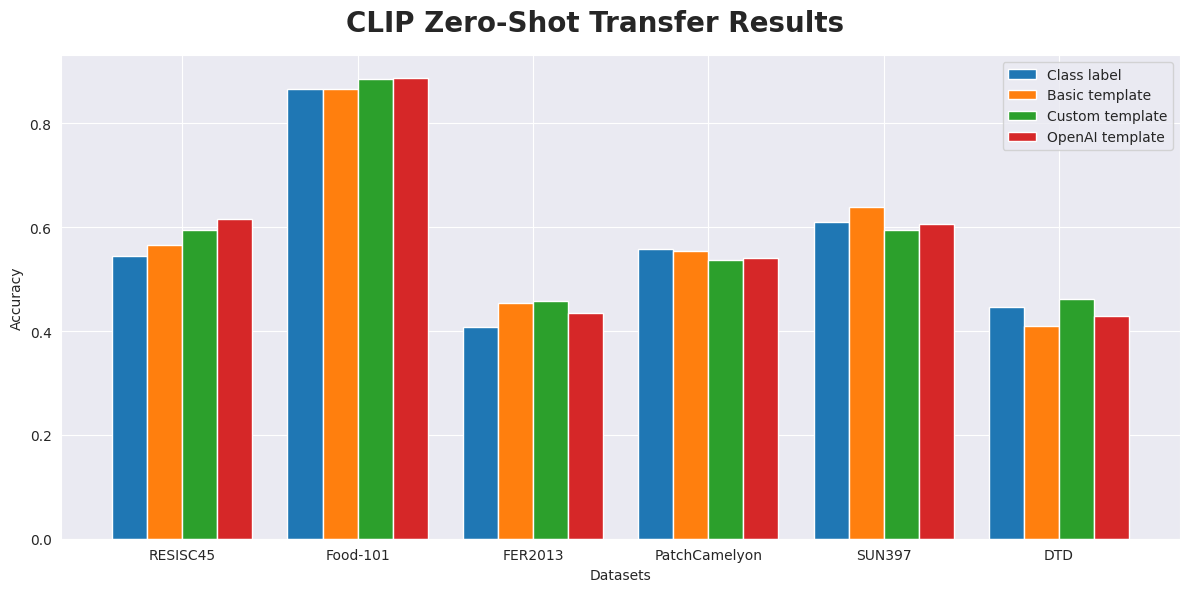

In [15]:
plot_results_bar(df, dataset_names, experiments, title="CLIP Zero-Shot Transfer Results")

### Visualization of the relative change when using templates

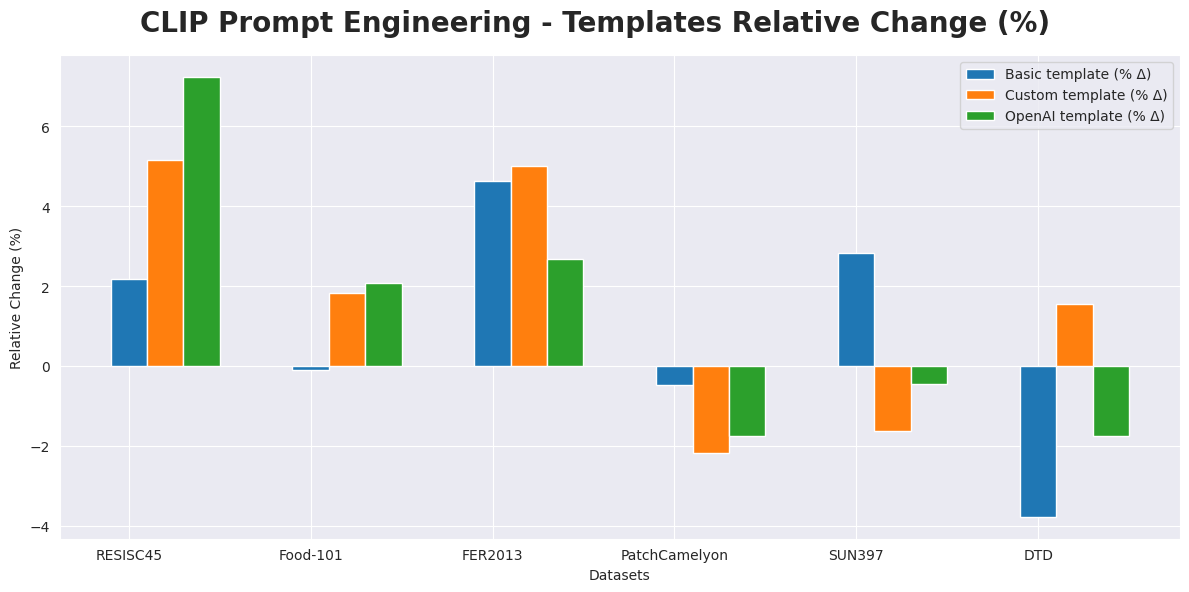

In [16]:
plot_relative_change(df.iloc[:, -3:], dataset_names, df.columns[-3:], title="CLIP Prompt Engineering - Templates Relative Change (%)", x_labels="Datasets")

## Few-Shot Linear Probing

In [17]:
n_shots = [1, 2, 4, 8, 16]

In [18]:
resisc45_vit_fslp = [0.281587, 0.386667, 0.531905, 0.616190, 0.691746]
food101_vit_fslp = [0.405149, 0.536436, 0.654970, 0.717149, 0.756554]
fer2013_vit_fslp = [0.308721, 0.309557, 0.311507, 0.309557, 0.419615]
pcam_vit_fslp = [0.302277, 0.372742, 0.468689, 0.720123, 0.717987]
sun397_vit_fslp = [0.427800, 0.534300, 0.612500, 0.659816, 0.657885]
dtd_vit_fslp = [0.270213, 0.361170, 0.456915, 0.521809, 0.594681]

resisc45_deit_fslp = [0.304762, 0.458095, 0.594127, 0.689206, 0.754762]
food101_deit_fslp = [0.198495, 0.301386, 0.425941, 0.520871, 0.597901]
fer2013_deit_fslp = [0.173865, 0.152689, 0.186960, 0.160490, 0.316801]
pcam_deit_fslp = [0.493317, 0.520508, 0.540375, 0.718689, 0.719208]
sun397_deit_fslp = [0.255264, 0.377425, 0.470023, 0.541471, 0.568368]
dtd_deit_fslp = [0.261170, 0.365426, 0.465957, 0.556915, 0.613830]

resisc45_swin_fslp = [0.339683, 0.481746, 0.632063, 0.711111, 0.761270]
food101_swin_fslp = [0.396554, 0.544277, 0.668792, 0.751485, 0.788792]
fer2013_swin_fslp = [0.276400, 0.250209, 0.317359, 0.363054, 0.437169]
pcam_swin_fslp = [0.466797, 0.484222, 0.426880, 0.749481, 0.762115]
sun397_swin_fslp = [0.406805, 0.529655, 0.622989, 0.671356, 0.691494]
dtd_swin_fslp = [0.373404, 0.467553, 0.522340, 0.589362, 0.651596]

resisc45_clip_fslp = [0.476032, 0.585079, 0.731587, 0.786508, 0.821429]
food101_clip_fslp = [0.358733, 0.535208, 0.646535, 0.727960, 0.785267]
fer2013_clip_fslp = [0.226247, 0.200613, 0.262190, 0.321538, 0.405127]
pcam_clip_fslp = [0.514862, 0.553131, 0.638550, 0.656250, 0.696045]
sun397_clip_fslp = [0.350621, 0.479172, 0.555402, 0.616552, 0.655724]
dtd_clip_fslp = [0.379787, 0.475532, 0.569681, 0.626596, 0.667021]

Aggregate results over datasets.

In [19]:
results_resisc45_fslp = [resisc45_vit_fslp, resisc45_deit_fslp, resisc45_swin_fslp, resisc45_clip_fslp]
results_food101_fslp = [food101_vit_fslp, food101_deit_fslp, food101_swin_fslp, food101_clip_fslp]
results_fer2013_fslp = [fer2013_vit_fslp, fer2013_deit_fslp, fer2013_swin_fslp, fer2013_clip_fslp]
results_pcam_fslp = [pcam_vit_fslp, pcam_deit_fslp, pcam_swin_fslp, pcam_clip_fslp]
results_sun397_fslp = [sun397_vit_fslp, sun397_deit_fslp, sun397_swin_fslp, sun397_clip_fslp]
results_dtd_fslp = [dtd_vit_fslp, dtd_deit_fslp, dtd_swin_fslp, dtd_clip_fslp]

Concatenate all results into a single variable.

In [20]:
results_fslp = [
    results_resisc45_fslp,
    results_food101_fslp,
    results_fer2013_fslp,
    results_pcam_fslp,
    results_sun397_fslp,
    results_dtd_fslp,
]

### Results

Results for each dataset shown in a table. Last four columns show the relative change (%) in accuracy when increasing the number of images shown to the model.

Create empty arrays to store mean for the relative changes (%) mentioned above.

In [21]:
two_shot_mean = []
four_shot_mean = []
eight_shot_mean = []
sixteen_shot_mean = []

In [22]:
mean_list = [
    two_shot_mean,
    four_shot_mean,
    eight_shot_mean,
    sixteen_shot_mean,
]

#### RESISC45

In [23]:
df = create_few_shot_table(results_resisc45_fslp, n_shots, models)
df

,1-shot,2-shot,4-shot,8-shot,16-shot,2-shot (% Δ),4-shot (% Δ),8-shot (% Δ),16-shot (% Δ)
ViT,0.281587,0.386667,0.531905,0.616190,0.691746,10.51,14.52,8.43,7.56
DeiT,0.304762,0.458095,0.594127,0.689206,0.754762,15.33,13.60,9.51,6.56
Swin,0.339683,0.481746,0.632063,0.711111,0.761270,14.21,15.03,7.90,5.02
CLIP,0.476032,0.585079,0.731587,0.786508,0.821429,10.90,14.65,5.49,3.49


In [24]:
desc = df.iloc[:, -4:].describe().T[['mean']].round(2)
print(desc)

                mean
2-shot (% Δ)   12.74
4-shot (% Δ)   14.45
8-shot (% Δ)    7.83
16-shot (% Δ)   5.66


In [25]:
for i, lst in enumerate(mean_list):
    lst.append(desc.iloc[i, 0])

#### Food-101

In [26]:
df = create_few_shot_table(results_food101_fslp, n_shots, models)
df

,1-shot,2-shot,4-shot,8-shot,16-shot,2-shot (% Δ),4-shot (% Δ),8-shot (% Δ),16-shot (% Δ)
ViT,0.405149,0.536436,0.654970,0.717149,0.756554,13.13,11.85,6.22,3.94
DeiT,0.198495,0.301386,0.425941,0.520871,0.597901,10.29,12.46,9.49,7.70
Swin,0.396554,0.544277,0.668792,0.751485,0.788792,14.77,12.45,8.27,3.73
CLIP,0.358733,0.535208,0.646535,0.727960,0.785267,17.65,11.13,8.14,5.73


In [27]:
desc = df.iloc[:, -4:].describe().T[['mean']].round(2)
print(desc)

                mean
2-shot (% Δ)   13.96
4-shot (% Δ)   11.97
8-shot (% Δ)    8.03
16-shot (% Δ)   5.28


In [28]:
for i, lst in enumerate(mean_list):
    lst.append(desc.iloc[i, 0])

#### FER2013

In [29]:
df = create_few_shot_table(results_fer2013_fslp, n_shots, models)
df

,1-shot,2-shot,4-shot,8-shot,16-shot,2-shot (% Δ),4-shot (% Δ),8-shot (% Δ),16-shot (% Δ)
ViT,0.308721,0.309557,0.311507,0.309557,0.419615,0.08,0.19,-0.19,11.01
DeiT,0.173865,0.152689,0.186960,0.160490,0.316801,-2.12,3.43,-2.65,15.63
Swin,0.276400,0.250209,0.317359,0.363054,0.437169,-2.62,6.71,4.57,7.41
CLIP,0.226247,0.200613,0.262190,0.321538,0.405127,-2.56,6.16,5.93,8.36


In [30]:
desc = df.iloc[:, -4:].describe().T[['mean']].round(2)
print(desc)

                mean
2-shot (% Δ)   -1.81
4-shot (% Δ)    4.12
8-shot (% Δ)    1.92
16-shot (% Δ)  10.60


In [31]:
for i, lst in enumerate(mean_list):
    lst.append(desc.iloc[i, 0])

#### PCam

In [32]:
df = create_few_shot_table(results_pcam_fslp, n_shots, models)
df

,1-shot,2-shot,4-shot,8-shot,16-shot,2-shot (% Δ),4-shot (% Δ),8-shot (% Δ),16-shot (% Δ)
ViT,0.302277,0.372742,0.468689,0.720123,0.717987,7.05,9.59,25.14,-0.21
DeiT,0.493317,0.520508,0.540375,0.718689,0.719208,2.72,1.99,17.83,0.05
Swin,0.466797,0.484222,0.426880,0.749481,0.762115,1.74,-5.73,32.26,1.26
CLIP,0.514862,0.553131,0.638550,0.656250,0.696045,3.83,8.54,1.77,3.98


In [33]:
desc = df.iloc[:, -4:].describe().T[['mean']].round(2)
print(desc)

                mean
2-shot (% Δ)    3.84
4-shot (% Δ)    3.60
8-shot (% Δ)   19.25
16-shot (% Δ)   1.27


In [34]:
for i, lst in enumerate(mean_list):
    lst.append(desc.iloc[i, 0])

#### SUN397

In [35]:
df = create_few_shot_table(results_sun397_fslp, n_shots, models)
df

,1-shot,2-shot,4-shot,8-shot,16-shot,2-shot (% Δ),4-shot (% Δ),8-shot (% Δ),16-shot (% Δ)
ViT,0.427800,0.534300,0.612500,0.659816,0.657885,10.65,7.82,4.73,-0.19
DeiT,0.255264,0.377425,0.470023,0.541471,0.568368,12.22,9.26,7.14,2.69
Swin,0.406805,0.529655,0.622989,0.671356,0.691494,12.28,9.33,4.84,2.01
CLIP,0.350621,0.479172,0.555402,0.616552,0.655724,12.86,7.62,6.12,3.92


In [36]:
desc = df.iloc[:, -4:].describe().T[['mean']].round(2)
print(desc)

                mean
2-shot (% Δ)   12.00
4-shot (% Δ)    8.51
8-shot (% Δ)    5.71
16-shot (% Δ)   2.11


In [37]:
for i, lst in enumerate(mean_list):
    lst.append(desc.iloc[i, 0])

#### DTD

In [38]:
df = create_few_shot_table(results_dtd_fslp, n_shots, models)
df

,1-shot,2-shot,4-shot,8-shot,16-shot,2-shot (% Δ),4-shot (% Δ),8-shot (% Δ),16-shot (% Δ)
ViT,0.270213,0.361170,0.456915,0.521809,0.594681,9.10,9.57,6.49,7.29
DeiT,0.261170,0.365426,0.465957,0.556915,0.613830,10.43,10.05,9.10,5.69
Swin,0.373404,0.467553,0.522340,0.589362,0.651596,9.41,5.48,6.70,6.22
CLIP,0.379787,0.475532,0.569681,0.626596,0.667021,9.57,9.41,5.69,4.04


In [39]:
desc = df.iloc[:, -4:].describe().T[['mean']].round(2)
print(desc)

               mean
2-shot (% Δ)   9.63
4-shot (% Δ)   8.63
8-shot (% Δ)   7.00
16-shot (% Δ)  5.81


In [40]:
for i, lst in enumerate(mean_list):
    lst.append(desc.iloc[i, 0])

### What was the average change in accuracy when increasing the number of images per class processed by the model?

In [41]:
df = pd.DataFrame(mean_list, columns=dataset_names, index=['2-shot (% Δ)', '4-shot (% Δ)', '8-shot (% Δ)', '16-shot (% Δ)'])
desc = df.T.describe().T[['mean']].round(2)
print(desc)

               mean
2-shot (% Δ)   8.39
4-shot (% Δ)   8.55
8-shot (% Δ)   8.29
16-shot (% Δ)  5.12


In [42]:
print(f"Increasing the {bold_string('number of images per class')} the model processed from {bold_string('1 image')} to {bold_string('2 images')} yielded on average a {bold_string(desc.iloc[0, 0])} % higher accuracy.")
print(f"Increasing the {bold_string('number of images per class')} the model processed from {bold_string('2 images')} to {bold_string('4 images')} yielded on average a {bold_string(desc.iloc[1, 0])} % higher accuracy.")
print(f"Increasing the {bold_string('number of images per class')} the model processed from {bold_string('4 images')} to {bold_string('8 images')} yielded on average a {bold_string(desc.iloc[2, 0])} % higher accuracy.")
print(f"Increasing the {bold_string('number of images per class')} the model processed from {bold_string('8 images')} to {bold_string('16 images')} yielded on average a {bold_string(desc.iloc[3, 0])} % higher accuracy.")

Increasing the number of images per class the model processed from 1 image to 2 images yielded on average a 8.39 % higher accuracy.
Increasing the number of images per class the model processed from 2 images to 4 images yielded on average a 8.55 % higher accuracy.
Increasing the number of images per class the model processed from 4 images to 8 images yielded on average a 8.29 % higher accuracy.
Increasing the number of images per class the model processed from 8 images to 16 images yielded on average a 5.12 % higher accuracy.


### Visualization of Few-Shot Linear Probing

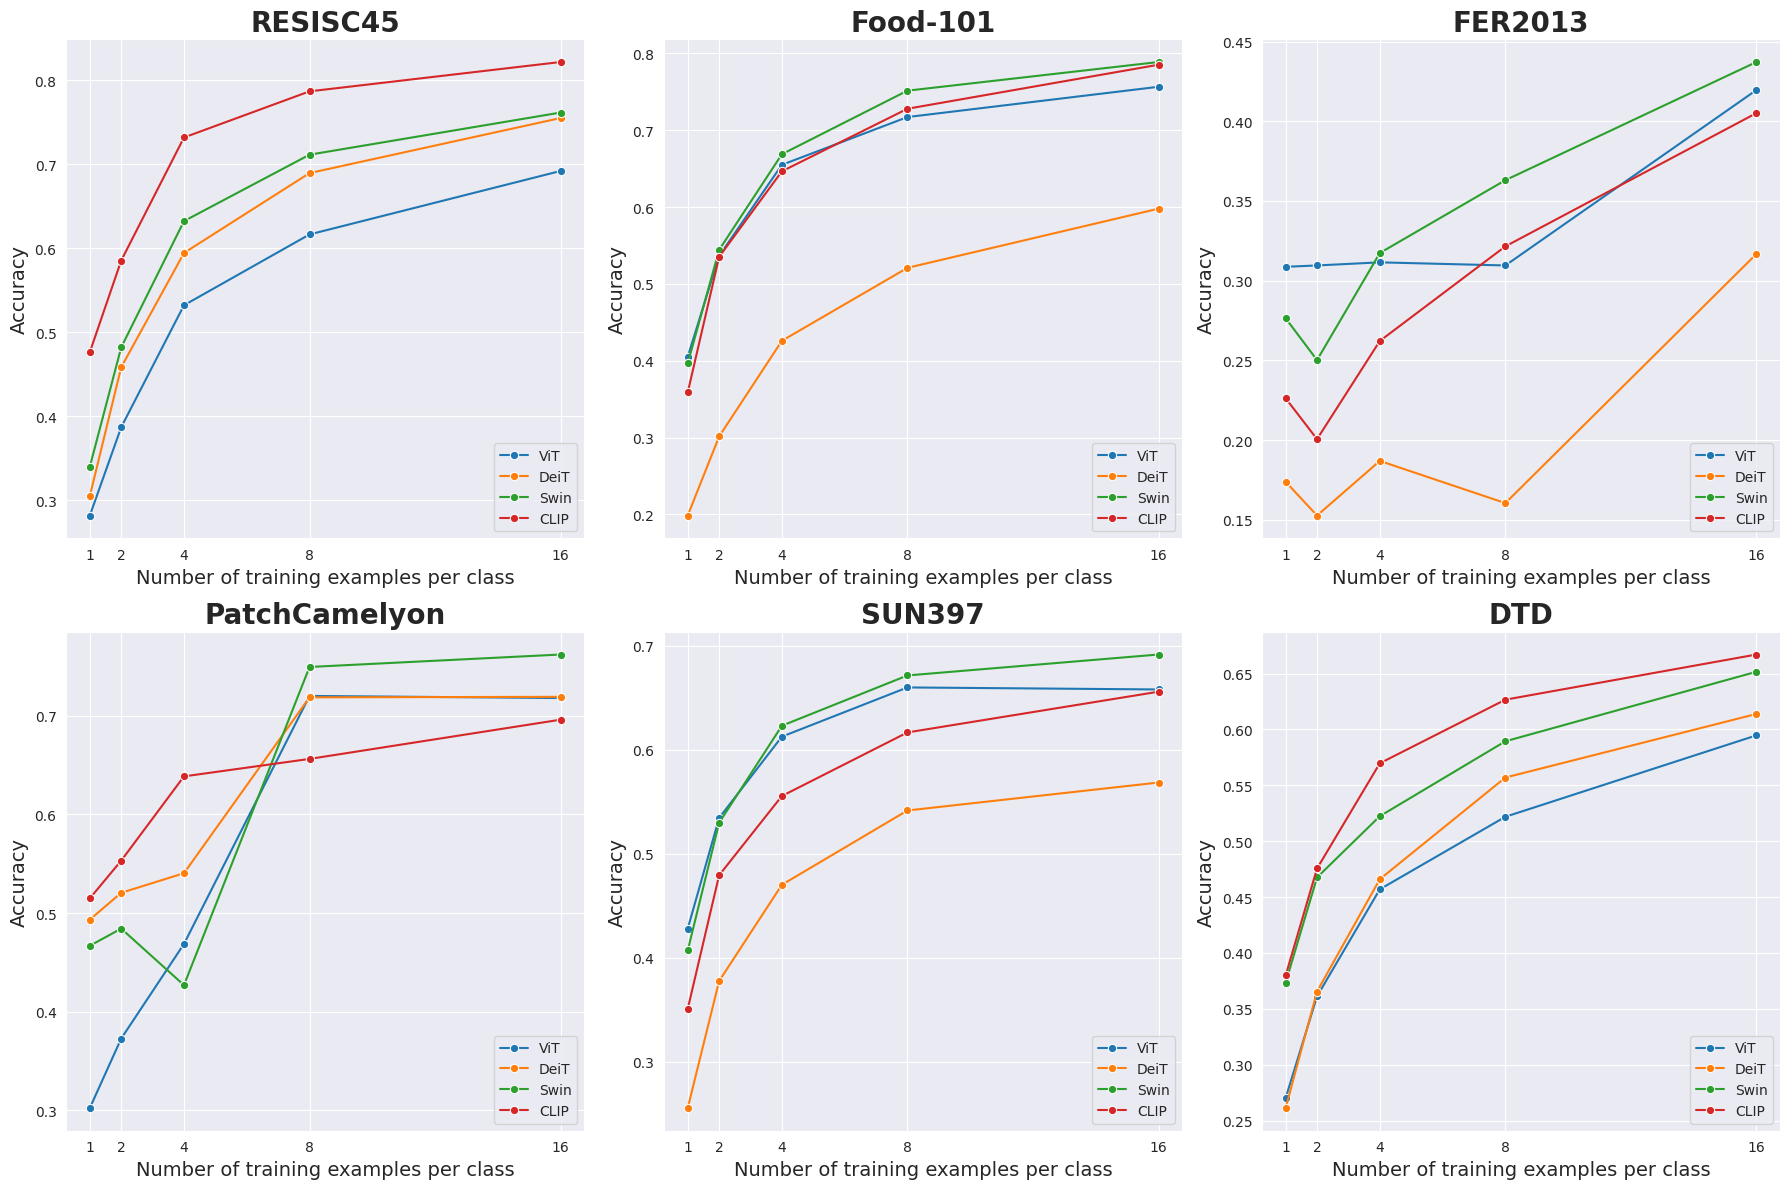

In [43]:
plot_few_shot_results_multiple(
    results_fslp, 
    dataset_names, 
    models,
)

## Linear probing

In [44]:
resisc45_vit_lp = 0.846349
food101_vit_lp = 0.859644
fer2013_vit_lp = 0.601839
pcam_vit_lp = 0.843079
sun397_vit_lp = 0.774529
dtd_vit_lp = 0.730319

resisc45_deit_lp = 0.886667
food101_deit_lp = 0.786297
fer2013_deit_lp = 0.527445
pcam_deit_lp = 0.832336
sun397_deit_lp = 0.726851
dtd_deit_lp = 0.714894

resisc45_swin_lp = 0.885397
food101_swin_lp = 0.894733
fer2013_swin_lp = 0.612148
pcam_swin_lp = 0.845551
sun397_swin_lp = 0.804184
dtd_swin_lp = 0.782447

resisc45_clip_lp = 0.898730
food101_clip_lp = 0.889149
fer2013_clip_lp = 0.670939
pcam_clip_lp = 0.836365
sun397_clip_lp = 0.790575
dtd_clip_lp = 0.726064

Aggregate results over datasets.

In [45]:
results_resisc45_lp = [resisc45_vit_lp, resisc45_deit_lp, resisc45_swin_lp, resisc45_clip_lp]
results_food101_lp = [food101_vit_lp, food101_deit_lp, food101_swin_lp, food101_clip_lp]
results_fer2013_lp = [fer2013_vit_lp, fer2013_deit_lp, fer2013_swin_lp, fer2013_clip_lp]
results_pcam_lp = [pcam_vit_lp, pcam_deit_lp, pcam_swin_lp, pcam_clip_lp]
results_sun397_lp = [sun397_vit_lp, sun397_deit_lp, sun397_swin_lp, sun397_clip_lp]
results_dtd_lp = [dtd_vit_lp, dtd_deit_lp, dtd_swin_lp, dtd_clip_lp]

Concatenate all results into a single variable.

In [46]:
results_lp = [
    results_resisc45_lp,
    results_food101_lp,
    results_fer2013_lp,
    results_pcam_lp,
    results_sun397_lp,
    results_dtd_lp,
]

In [47]:
acc_dict_lp = create_accuracy_dict(
    results_lp,
    dataset_names
)

In [48]:
df_lp = pd.DataFrame(results_lp, columns=[n for n in models], index=dataset_names)
df_lp

,ViT,DeiT,Swin,CLIP
RESISC45,0.846349,0.886667,0.885397,0.898730
Food-101,0.859644,0.786297,0.894733,0.889149
FER2013,0.601839,0.527445,0.612148,0.670939
PatchCamelyon,0.843079,0.832336,0.845551,0.836365
SUN397,0.774529,0.726851,0.804184,0.790575
DTD,0.730319,0.714894,0.782447,0.726064


Print the model that achieved the highest accuracy for each dataset.

In [49]:
for dataset, values in acc_dict_lp.items():
    max_value = max(values)
    best_model = models[values.index(max_value)]
    print(f"For dataset {bold_string(dataset)}, the best model using {bold_string('linear probing')} is {bold_string(best_model)} with an accuracy of {bold_string(f'{max_value:.4f}')}")

For dataset RESISC45, the best model using linear probing is CLIP with an accuracy of 0.8987
For dataset Food-101, the best model using linear probing is Swin with an accuracy of 0.8947
For dataset FER2013, the best model using linear probing is CLIP with an accuracy of 0.6709
For dataset PatchCamelyon, the best model using linear probing is Swin with an accuracy of 0.8456
For dataset SUN397, the best model using linear probing is Swin with an accuracy of 0.8042
For dataset DTD, the best model using linear probing is Swin with an accuracy of 0.7824


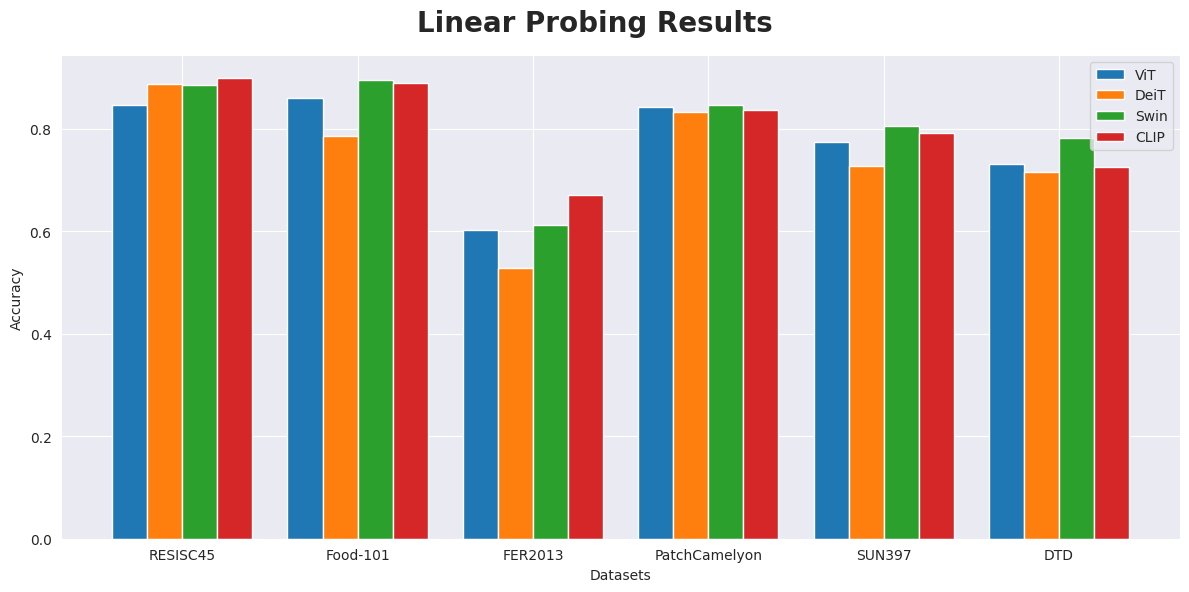

In [50]:
plot_results_bar(df_lp, dataset_names, models, title="Linear Probing Results")

## Fine-tuning

In [51]:
resisc45_vit_ft = 0.946032
food101_vit_ft = 0.877861
fer2013_vit_ft = 0.697687
pcam_vit_ft = 0.888702
sun397_vit_ft = 0.763540
dtd_vit_ft = 0.788830

resisc45_deit_ft = 0.931429
food101_deit_ft = 0.857505
fer2013_deit_ft = 0.698245
pcam_deit_ft = 0.838531
sun397_deit_ft = 0.721149
dtd_deit_ft = 0.771277

resisc45_swin_ft = 0.958095
food101_swin_ft = 0.895842
fer2013_swin_ft = 0.703817
pcam_swin_ft = 0.850311
sun397_swin_ft = 0.778621
dtd_swin_ft = 0.821809

resisc45_clip_ft = 0.879524
food101_clip_ft = 0.794693
fer2013_clip_ft = 0.686542
pcam_clip_ft = 0.833099
sun397_clip_ft = 0.661333
dtd_clip_ft = 0.657447

Aggregate results over datasets.

In [52]:
results_resisc45_ft = [resisc45_vit_ft, resisc45_deit_ft, resisc45_swin_ft, resisc45_clip_ft]
results_food101_ft = [food101_vit_ft, food101_deit_ft, food101_swin_ft, food101_clip_ft]
results_fer2013_ft = [fer2013_vit_ft, fer2013_deit_ft, fer2013_swin_ft, fer2013_clip_ft]
results_pcam_ft = [pcam_vit_ft, pcam_deit_ft, pcam_swin_ft, pcam_clip_ft]
results_sun397_ft = [sun397_vit_ft, sun397_deit_ft, sun397_swin_ft, sun397_clip_ft]
results_dtd_ft = [dtd_vit_ft, dtd_deit_ft, dtd_swin_ft, dtd_clip_ft]

Concatenate all results into a single variable.

In [53]:
results_ft = [
    results_resisc45_ft,
    results_food101_ft,
    results_fer2013_ft,
    results_pcam_ft,
    results_sun397_ft,
    results_dtd_ft,
]

In [54]:
acc_dict_ft = create_accuracy_dict(
    results_ft,
    dataset_names
)

In [55]:
df_ft = pd.DataFrame(results_ft, columns=[n for n in models], index=dataset_names)
df_ft

,ViT,DeiT,Swin,CLIP
RESISC45,0.946032,0.931429,0.958095,0.879524
Food-101,0.877861,0.857505,0.895842,0.794693
FER2013,0.697687,0.698245,0.703817,0.686542
PatchCamelyon,0.888702,0.838531,0.850311,0.833099
SUN397,0.763540,0.721149,0.778621,0.661333
DTD,0.788830,0.771277,0.821809,0.657447


Print the model that achieved the highest accuracy for each dataset.

In [56]:
for dataset, values in acc_dict_ft.items():
    max_value = max(values)
    best_model = models[values.index(max_value)]
    print(f"For dataset {bold_string(dataset)}, the best model using {bold_string('fine-tuning')} is {bold_string(best_model)} with an accuracy of {bold_string(f'{max_value:.4f}')}")

For dataset RESISC45, the best model using fine-tuning is Swin with an accuracy of 0.9581
For dataset Food-101, the best model using fine-tuning is Swin with an accuracy of 0.8958
For dataset FER2013, the best model using fine-tuning is Swin with an accuracy of 0.7038
For dataset PatchCamelyon, the best model using fine-tuning is ViT with an accuracy of 0.8887
For dataset SUN397, the best model using fine-tuning is Swin with an accuracy of 0.7786
For dataset DTD, the best model using fine-tuning is Swin with an accuracy of 0.8218


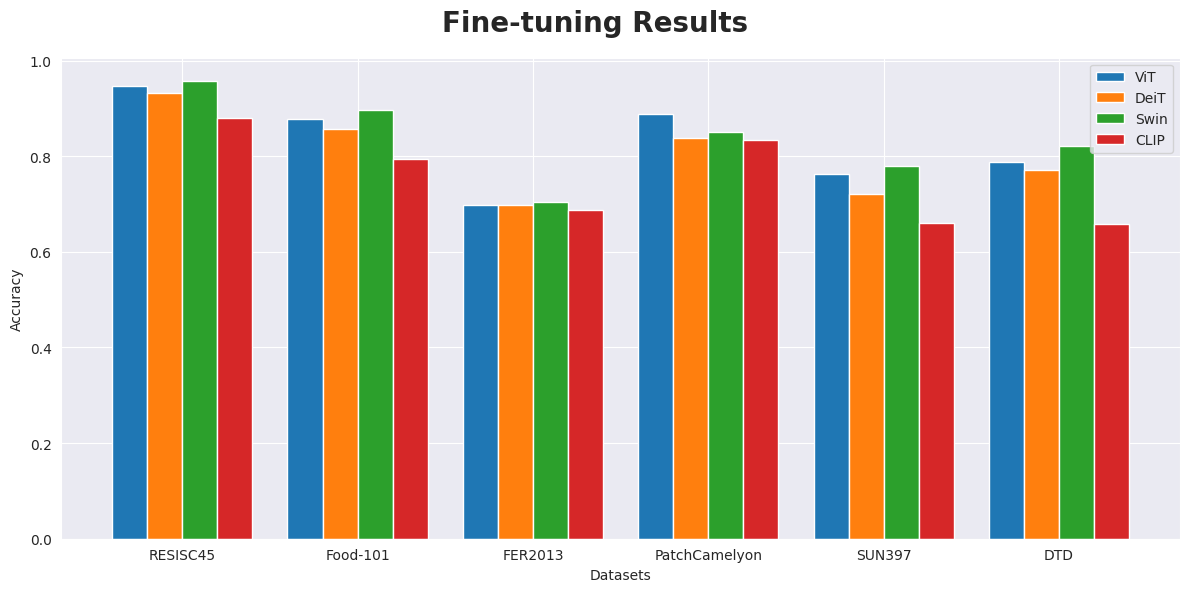

In [57]:
plot_results_bar(df_ft, dataset_names, models, title="Fine-tuning Results")

## Fine-tuning with data augmentations

In [58]:
resisc45_vit_ftda = 0.950635
food101_vit_ftda = 0.872317
fer2013_vit_ftda = 0.709111
pcam_vit_ftda = 0.871582
sun397_vit_ftda = 0.770805
dtd_vit_ftda = 0.786702

resisc45_deit_ftda = 0.955397
food101_deit_ftda = 0.845109
fer2013_deit_ftda = 0.686821
pcam_deit_ftda = 0.881317
sun397_deit_ftda = 0.732966
dtd_deit_ftda = 0.772340

resisc45_swin_ftda = 0.948889
food101_swin_ftda = 0.901703
fer2013_swin_ftda = 0.715798
pcam_swin_ftda = 0.898834
sun397_swin_ftda = 0.789425
dtd_swin_ftda = 0.807447

resisc45_clip_ftda = 0.947778
food101_clip_ftda = 0.815089
fer2013_clip_ftda = 0.677069
pcam_clip_ftda = 0.840698
sun397_clip_ftda = 0.685517
dtd_clip_ftda = 0.703191

Aggregate results over datasets.

In [59]:
results_resisc45_ftda = [resisc45_vit_ftda, resisc45_deit_ftda, resisc45_swin_ftda, resisc45_clip_ftda]
results_food101_ftda = [food101_vit_ftda, food101_deit_ftda, food101_swin_ftda, food101_clip_ftda]
results_fer2013_ftda = [fer2013_vit_ftda, fer2013_deit_ftda, fer2013_swin_ftda, fer2013_clip_ftda]
results_pcam_ftda = [pcam_vit_ftda, pcam_deit_ftda, pcam_swin_ftda, pcam_clip_ftda]
results_sun397_ftda = [sun397_vit_ftda, sun397_deit_ftda, sun397_swin_ftda, sun397_clip_ftda]
results_dtd_ftda = [dtd_vit_ftda, dtd_deit_ftda, dtd_swin_ftda, dtd_clip_ftda]

Concatenate all results into a single variable.

In [60]:
results_ftda = [
    results_resisc45_ftda,
    results_food101_ftda,
    results_fer2013_ftda,
    results_pcam_ftda,
    results_sun397_ftda,
    results_dtd_ftda,
]

In [61]:
acc_dict_ftda = create_accuracy_dict(
    results_ftda,
    dataset_names
)

In [62]:
df_ftda = pd.DataFrame(results_ftda, columns=[n for n in models], index=dataset_names)
df_ftda

,ViT,DeiT,Swin,CLIP
RESISC45,0.950635,0.955397,0.948889,0.947778
Food-101,0.872317,0.845109,0.901703,0.815089
FER2013,0.709111,0.686821,0.715798,0.677069
PatchCamelyon,0.871582,0.881317,0.898834,0.840698
SUN397,0.770805,0.732966,0.789425,0.685517
DTD,0.786702,0.772340,0.807447,0.703191


Print the model that achieved the highest accuracy for each dataset.

In [63]:
for dataset, values in acc_dict_ftda.items():
    max_value = max(values)
    best_model = models[values.index(max_value)]
    print(f"For dataset {bold_string(dataset)}, the best model using {bold_string('fine-tuning with data augmentations')} is {bold_string(best_model)} with an accuracy of {bold_string(f'{max_value:.4f}')}")

For dataset RESISC45, the best model using fine-tuning with data augmentations is DeiT with an accuracy of 0.9554
For dataset Food-101, the best model using fine-tuning with data augmentations is Swin with an accuracy of 0.9017
For dataset FER2013, the best model using fine-tuning with data augmentations is Swin with an accuracy of 0.7158
For dataset PatchCamelyon, the best model using fine-tuning with data augmentations is Swin with an accuracy of 0.8988
For dataset SUN397, the best model using fine-tuning with data augmentations is Swin with an accuracy of 0.7894
For dataset DTD, the best model using fine-tuning with data augmentations is Swin with an accuracy of 0.8074


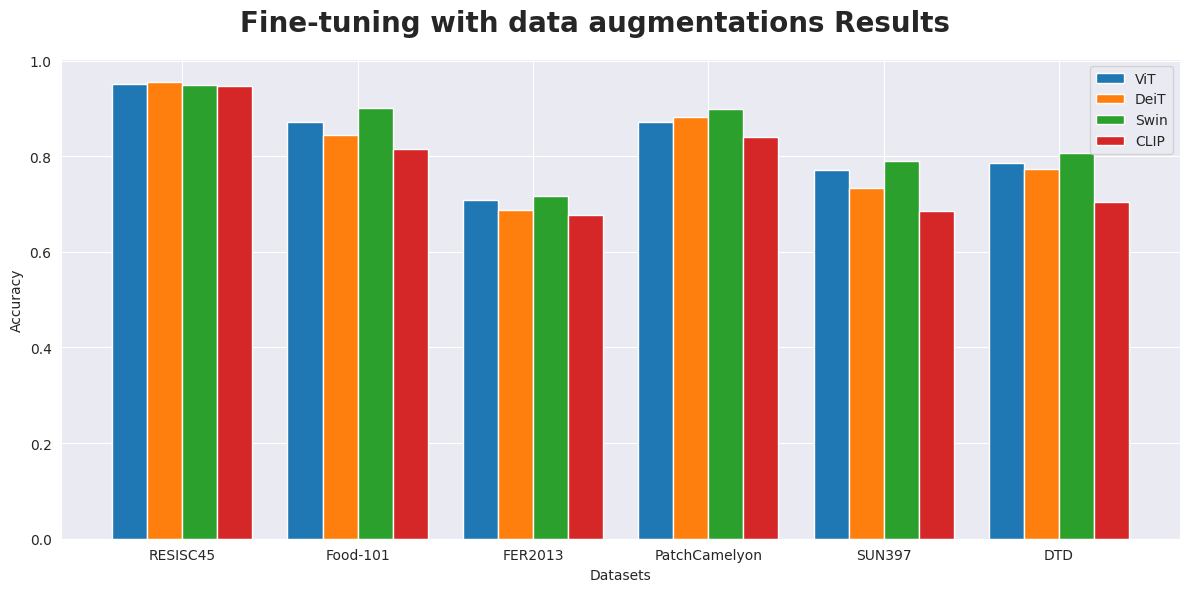

In [64]:
plot_results_bar(df_ftda, dataset_names, models, title="Fine-tuning with data augmentations Results")

## Which training strategy yielded the highest accuracy on average?

In [72]:
results_lp_np = np.array(results_lp)
results_ft_np = np.array(results_ft)
results_ftda_np = np.array(results_ftda)
results_agg = np.hstack((results_lp_np, results_ft_np, results_ftda_np))

### Vision Transformer (ViT)

In [88]:
df = pd.DataFrame(results_agg[:, [0, 4, 8]], columns=['linear probing', 'fine-tuning', 'fine-tuning with data augmentations'], index=dataset_names)
df['lp vs. ft (% Δ)'] = ((df['fine-tuning'] - df['linear probing']) * 100).round(2)
df['lp vs. ftda (% Δ)'] = ((df['fine-tuning with data augmentations'] - df['linear probing']) * 100).round(2)
df['ft vs. ftda (% Δ)'] = ((df['fine-tuning with data augmentations'] - df['fine-tuning']) * 100).round(2)
df_rel = df.iloc[:, -3:]
df_rel

,lp vs. ft (% Δ),lp vs. ftda (% Δ),ft vs. ftda (% Δ)
RESISC45,9.97,10.43,0.46
Food-101,1.82,1.27,-0.55
FER2013,9.58,10.73,1.14
PatchCamelyon,4.56,2.85,-1.71
SUN397,-1.10,-0.37,0.73
DTD,5.85,5.64,-0.21


In [89]:
print(f"For model {bold_string('ViT')}, {bold_string('fine-tuning')} yielded on average {bold_string(df['lp vs. ft (% Δ)'].mean().round(2))} % better results than {bold_string('linear probing')}.")
print(f"For model {bold_string('ViT')}, {bold_string('fine-tuning with data augmentations')} yielded on average {bold_string(df['lp vs. ftda (% Δ)'].mean().round(2))} % better results than {bold_string('linear probing')}.")
print(f"For model {bold_string('ViT')}, {bold_string('fine-tuning with data augmentations')} yielded on average {bold_string(df['ft vs. ftda (% Δ)'].mean().round(2))} % worse results than {bold_string('fine-tuning')}.")

For model ViT, fine-tuning yielded on average 5.11 % better results than linear probing.
For model ViT, fine-tuning with data augmentations yielded on average 5.09 % better results than linear probing.
For model ViT, fine-tuning with data augmentations yielded on average -0.02 % worse results than fine-tuning.


In [90]:
for i, row in df.iloc[:, :3].iterrows():
    print(f"For dataset {bold_string(i)}, model {bold_string('ViT')} performed the best using {bold_string(row.idxmax())} with an accuracy of {bold_string(row.max().round(4))}")

For dataset RESISC45, model ViT performed the best using fine-tuning with data augmentations with an accuracy of 0.9506
For dataset Food-101, model ViT performed the best using fine-tuning with an accuracy of 0.8779
For dataset FER2013, model ViT performed the best using fine-tuning with data augmentations with an accuracy of 0.7091
For dataset PatchCamelyon, model ViT performed the best using fine-tuning with an accuracy of 0.8887
For dataset SUN397, model ViT performed the best using linear probing with an accuracy of 0.7745
For dataset DTD, model ViT performed the best using fine-tuning with an accuracy of 0.7888


### Data-efficient image Transformer (DeiT)

In [91]:
df = pd.DataFrame(results_agg[:, [1, 5, 9]], columns=['linear probing', 'fine-tuning', 'fine-tuning with data augmentations'], index=dataset_names)
df['lp vs. ft (% Δ)'] = ((df['fine-tuning'] - df['linear probing']) * 100).round(2)
df['lp vs. ftda (% Δ)'] = ((df['fine-tuning with data augmentations'] - df['linear probing']) * 100).round(2)
df['ft vs. ftda (% Δ)'] = ((df['fine-tuning with data augmentations'] - df['fine-tuning']) * 100).round(2)
df_rel = df.iloc[:, -3:]
df_rel

,lp vs. ft (% Δ),lp vs. ftda (% Δ),ft vs. ftda (% Δ)
RESISC45,4.48,6.87,2.40
Food-101,7.12,5.88,-1.24
FER2013,17.08,15.94,-1.14
PatchCamelyon,0.62,4.90,4.28
SUN397,-0.57,0.61,1.18
DTD,5.64,5.74,0.11


In [92]:
print(f"For model {bold_string('DeiT')}, {bold_string('fine-tuning')} yielded on average {bold_string(df['lp vs. ft (% Δ)'].mean().round(2))} % better results than {bold_string('linear probing')}.")
print(f"For model {bold_string('DeiT')}, {bold_string('fine-tuning with data augmentations')} yielded on average {bold_string(df['lp vs. ftda (% Δ)'].mean().round(2))} % better results than {bold_string('linear probing')}.")
print(f"For model {bold_string('DeiT')}, {bold_string('fine-tuning with data augmentations')} yielded on average {bold_string(df['ft vs. ftda (% Δ)'].mean().round(2))} % better results than {bold_string('fine-tuning')}.")

For model DeiT, fine-tuning yielded on average 5.73 % better results than linear probing.
For model DeiT, fine-tuning with data augmentations yielded on average 6.66 % better results than linear probing.
For model DeiT, fine-tuning with data augmentations yielded on average 0.93 % better results than fine-tuning.


In [93]:
for i, row in df.iloc[:, :3].iterrows():
    print(f"For dataset {bold_string(i)}, model {bold_string('DeiT')} performed the best using {bold_string(row.idxmax())} with an accuracy of {bold_string(row.max().round(4))}")

For dataset RESISC45, model DeiT performed the best using fine-tuning with data augmentations with an accuracy of 0.9554
For dataset Food-101, model DeiT performed the best using fine-tuning with an accuracy of 0.8575
For dataset FER2013, model DeiT performed the best using fine-tuning with an accuracy of 0.6982
For dataset PatchCamelyon, model DeiT performed the best using fine-tuning with data augmentations with an accuracy of 0.8813
For dataset SUN397, model DeiT performed the best using fine-tuning with data augmentations with an accuracy of 0.733
For dataset DTD, model DeiT performed the best using fine-tuning with data augmentations with an accuracy of 0.7723


### Swin Transformer (Swin)

In [96]:
df = pd.DataFrame(results_agg[:, [2, 6, 10]], columns=['linear probing', 'fine-tuning', 'fine-tuning with data augmentations'], index=dataset_names)
df['lp vs. ft (% Δ)'] = ((df['fine-tuning'] - df['linear probing']) * 100).round(2)
df['lp vs. ftda (% Δ)'] = ((df['fine-tuning with data augmentations'] - df['linear probing']) * 100).round(2)
df['ft vs. ftda (% Δ)'] = ((df['fine-tuning with data augmentations'] - df['fine-tuning']) * 100).round(2)
df_rel = df.iloc[:, -3:]
df_rel

,lp vs. ft (% Δ),lp vs. ftda (% Δ),ft vs. ftda (% Δ)
RESISC45,7.27,6.35,-0.92
Food-101,0.11,0.70,0.59
FER2013,9.17,10.37,1.20
PatchCamelyon,0.48,5.33,4.85
SUN397,-2.56,-1.48,1.08
DTD,3.94,2.50,-1.44


In [97]:
print(f"For model {bold_string('Swin')}, {bold_string('fine-tuning')} yielded on average {bold_string(df['lp vs. ft (% Δ)'].mean().round(2))} % better results than {bold_string('linear probing')}.")
print(f"For model {bold_string('Swin')}, {bold_string('fine-tuning with data augmentations')} yielded on average {bold_string(df['lp vs. ftda (% Δ)'].mean().round(2))} % better results than {bold_string('linear probing')}.")
print(f"For model {bold_string('Swin')}, {bold_string('fine-tuning with data augmentations')} yielded on average {bold_string(df['ft vs. ftda (% Δ)'].mean().round(2))} % better results than {bold_string('fine-tuning')}.")

For model Swin, fine-tuning yielded on average 3.07 % better results than linear probing.
For model Swin, fine-tuning with data augmentations yielded on average 3.96 % better results than linear probing.
For model Swin, fine-tuning with data augmentations yielded on average 0.89 % better results than fine-tuning.


In [98]:
for i, row in df.iloc[:, :3].iterrows():
    print(f"For dataset {bold_string(i)}, model {bold_string('Swin')} performed the best using {bold_string(row.idxmax())} with an accuracy of {bold_string(row.max().round(4))}")

For dataset RESISC45, model Swin performed the best using fine-tuning with an accuracy of 0.9581
For dataset Food-101, model Swin performed the best using fine-tuning with data augmentations with an accuracy of 0.9017
For dataset FER2013, model Swin performed the best using fine-tuning with data augmentations with an accuracy of 0.7158
For dataset PatchCamelyon, model Swin performed the best using fine-tuning with data augmentations with an accuracy of 0.8988
For dataset SUN397, model Swin performed the best using linear probing with an accuracy of 0.8042
For dataset DTD, model Swin performed the best using fine-tuning with an accuracy of 0.8218


### Contrastive Language-Image Pre-Training (CLIP)

In [100]:
df = pd.DataFrame(results_agg[:, [3, 7, 11]], columns=['linear probing', 'fine-tuning', 'fine-tuning with data augmentations'], index=dataset_names)
df['lp vs. ft (% Δ)'] = ((df['fine-tuning'] - df['linear probing']) * 100).round(2)
df['lp vs. ftda (% Δ)'] = ((df['fine-tuning with data augmentations'] - df['linear probing']) * 100).round(2)
df['ft vs. ftda (% Δ)'] = ((df['fine-tuning with data augmentations'] - df['fine-tuning']) * 100).round(2)
df_rel = df.iloc[:, -3:]
df_rel

,lp vs. ft (% Δ),lp vs. ftda (% Δ),ft vs. ftda (% Δ)
RESISC45,-1.92,4.90,6.83
Food-101,-9.45,-7.41,2.04
FER2013,1.56,0.61,-0.95
PatchCamelyon,-0.33,0.43,0.76
SUN397,-12.92,-10.51,2.42
DTD,-6.86,-2.29,4.57


In [102]:
print(f"For model {bold_string('CLIP')}, {bold_string('fine-tuning')} yielded on average {bold_string(df['lp vs. ft (% Δ)'].mean().round(2))} % worse results than {bold_string('linear probing')}.")
print(f"For model {bold_string('CLIP')}, {bold_string('fine-tuning with data augmentations')} yielded on average {bold_string(df['lp vs. ftda (% Δ)'].mean().round(2))} % worse results than {bold_string('linear probing')}.")
print(f"For model {bold_string('CLIP')}, {bold_string('fine-tuning with data augmentations')} yielded on average {bold_string(df['ft vs. ftda (% Δ)'].mean().round(2))} % better results than {bold_string('fine-tuning')}.")

For model CLIP, fine-tuning yielded on average -4.99 % worse results than linear probing.
For model CLIP, fine-tuning with data augmentations yielded on average -2.38 % worse results than linear probing.
For model CLIP, fine-tuning with data augmentations yielded on average 2.61 % better results than fine-tuning.


In [103]:
for i, row in df.iloc[:, :3].iterrows():
    print(f"For dataset {bold_string(i)}, model {bold_string('CLIP')} performed the best using {bold_string(row.idxmax())} with an accuracy of {bold_string(row.max().round(4))}")

For dataset RESISC45, model CLIP performed the best using fine-tuning with data augmentations with an accuracy of 0.9478
For dataset Food-101, model CLIP performed the best using linear probing with an accuracy of 0.8891
For dataset FER2013, model CLIP performed the best using fine-tuning with an accuracy of 0.6865
For dataset PatchCamelyon, model CLIP performed the best using fine-tuning with data augmentations with an accuracy of 0.8407
For dataset SUN397, model CLIP performed the best using linear probing with an accuracy of 0.7906
For dataset DTD, model CLIP performed the best using linear probing with an accuracy of 0.7261


## Which combination of training strategy and model yielded the highest accuracy for each dataset?

In [120]:
cols = [
    'ViT - lp',
    'DeiT - lp',
    'Swin - lp',
    'CLIP - lp',
    'ViT - ft',
    'DeiT - ft',
    'Swin - ft',
    'CLIP - ft',
    'ViT - ftda',
    'DeiT - ftda',
    'Swin - ftda',
    'CLIP - ftda',
]

In [121]:
df = pd.DataFrame(results_agg, columns=cols, index=dataset_names)
df

,ViT - lp,DeiT - lp,Swin - lp,CLIP - lp,ViT - ft,DeiT - ft,Swin - ft,CLIP - ft,ViT - ftda,DeiT - ftda,Swin - ftda,CLIP - ftda
RESISC45,0.846349,0.886667,0.885397,0.898730,0.946032,0.931429,0.958095,0.879524,0.950635,0.955397,0.948889,0.947778
Food-101,0.859644,0.786297,0.894733,0.889149,0.877861,0.857505,0.895842,0.794693,0.872317,0.845109,0.901703,0.815089
FER2013,0.601839,0.527445,0.612148,0.670939,0.697687,0.698245,0.703817,0.686542,0.709111,0.686821,0.715798,0.677069
PatchCamelyon,0.843079,0.832336,0.845551,0.836365,0.888702,0.838531,0.850311,0.833099,0.871582,0.881317,0.898834,0.840698
SUN397,0.774529,0.726851,0.804184,0.790575,0.763540,0.721149,0.778621,0.661333,0.770805,0.732966,0.789425,0.685517
DTD,0.730319,0.714894,0.782447,0.726064,0.788830,0.771277,0.821809,0.657447,0.786702,0.772340,0.807447,0.703191


In [133]:
for dataset in df.index:
    best_comb = df.loc[dataset].idxmax()
    best_accuracy = df.loc[dataset].max()
    print(f"For dataset {bold_string(dataset)}, the best combination was {bold_string(best_comb)} with accuracy of {bold_string(f'{best_accuracy:.4f}')}")

For dataset RESISC45, the best combination was Swin - ft with accuracy of 0.9581
For dataset Food-101, the best combination was Swin - ftda with accuracy of 0.9017
For dataset FER2013, the best combination was Swin - ftda with accuracy of 0.7158
For dataset PatchCamelyon, the best combination was Swin - ftda with accuracy of 0.8988
For dataset SUN397, the best combination was Swin - lp with accuracy of 0.8042
For dataset DTD, the best combination was Swin - ft with accuracy of 0.8218
